In [ ]:
import dcss.toroidalField
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from matplotlib import cm
from typing import Tuple

# 环形场$A(\theta,\zeta)$的描述


使用函数基$\mathrm{e}^{\mathrm{i}(m\theta-nN_{fp}\zeta)}$去描述二维环形场$A(\theta,\zeta)$
$$
    A(\theta,\zeta) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$
其中$N_{fp}$为 the number of the toroidal field periods。当$A$为实数时，$A_{0,0}$为实数，且$A_{m,m}$满足$A_{m,n}=A^*_{-m,-n}$，此时有
$$
\begin{aligned}
    A(\theta, \zeta) =& A_{0,0} +
    \sum_{n=1}^N(A_{0,n}\exp(-\mathrm{i}nN_{fp}\zeta) + A^*_{0,n}\exp(\mathrm{i}nN_{fp}\zeta)) \\
    +& \sum_{m=1}^M\sum_{n=-N}^N(A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))+A^*_{m,n}\exp(-\mathrm{i}(m\theta-nN_{fp}\zeta)))
\end{aligned}
$$
因此描述一个环形场需要一个实数和$(N+M(2N+1))$个复数。
利用Euler公式$\mathrm{e}^{\mathrm{i}\alpha}=\cos\alpha+\mathrm{i}\sin\alpha$有
$$
\begin{aligned}
    A(\theta,\zeta) &= \Re(A_{0,0}) + 2\sum_{n=1}^{N}\{ \Re(A_{0,n})\cos(-nN_{fp}\zeta)-\Im(A_{0,n})\sin(-nN_{fp}\zeta) \} \\
    &+ 2\sum_{m=1}^{M}\sum_{n=-N}^N\{ \Re(A_{m,n})\cos(m\theta-nN_{fp}\zeta)-\Im(A_{m,n})\sin(m\theta-nN_{fp}\zeta) \}
\end{aligned}
$$

In [ ]:
nfp = 2
funA = lambda theta, zeta: 1 + np.sin(theta-nfp*zeta) + 0.2*np.cos(3*theta+2*nfp*zeta)
funB = lambda theta, zeta: -0.5 + 1.1*np.cos(2*theta-nfp*zeta) - 0.2*np.sin(theta+2*nfp*zeta) + 0.05*np.cos(3*theta-nfp*zeta)

sampleNumsTheta, sampleNumsZeta = 6, 4
deltaTheta = 2*np.pi / (2*sampleNumsTheta+1)
deltaZeta = 2*np.pi / nfp / (2*sampleNumsZeta+1)
sampleTheta, sampleZeta = np.arange(2*sampleNumsTheta+1)*deltaTheta, np.arange(2*sampleNumsZeta+1)*deltaZeta
gridSampleZeta, gridSampleTheta = np.meshgrid(sampleZeta, sampleTheta)
sampleA = funA(gridSampleTheta, -gridSampleZeta)
sampleB = funB(gridSampleTheta, -gridSampleZeta)

fieldA = dcss.toroidalField.fftToroidalField(sampleA, nfp=nfp)
fieldB = dcss.toroidalField.fftToroidalField(sampleB, nfp=nfp)

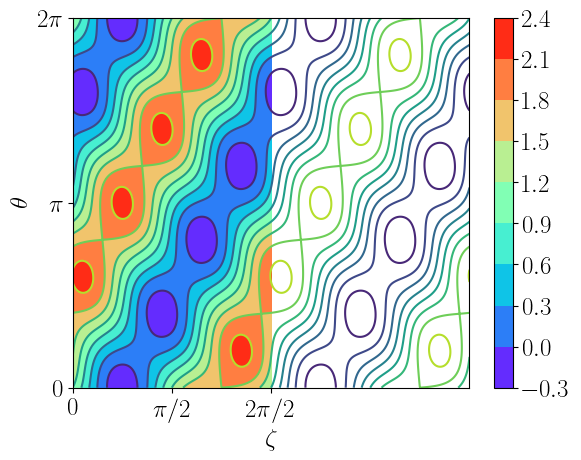

In [ ]:
basisTheta, basisZeta = np.linspace(0, 2*np.pi, 500), np.linspace(0, 2*np.pi, 500)
gridBasisZeta, gridBasisTheta = np.meshgrid(basisZeta, basisTheta)

fig, ax = plt.subplots()
ax.contour(
    gridBasisZeta, gridBasisTheta, funA(gridBasisTheta,gridBasisZeta)
)
fieldA.plot_plt(ax=ax, fig=fig, onePeriod=True)

# 环形场$A(\theta,\zeta)$和$B(\theta,\zeta)$的加减


$$
    A(\theta,\zeta)+B(\theta,\zeta) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}(A_{m,n}+B_{m,n})\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$
$$
    A(\theta,\zeta)-B(\theta,\zeta) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}(A_{m,n}-B_{m,n})\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$

In [ ]:
fieldAdd = fieldA + fieldB
fieldSubtract = fieldA - fieldB

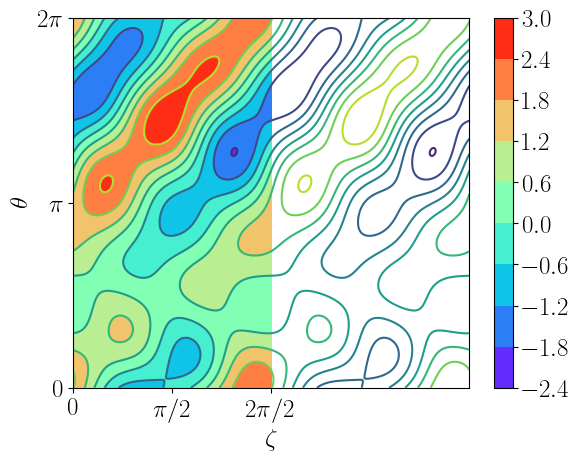

In [ ]:
fig, ax = plt.subplots()
ax.contour(
    gridBasisZeta, gridBasisTheta, funA(gridBasisTheta,gridBasisZeta)+funB(gridBasisTheta,gridBasisZeta)
)
fieldAdd.plot_plt(ax=ax, fig=fig, onePeriod=True)

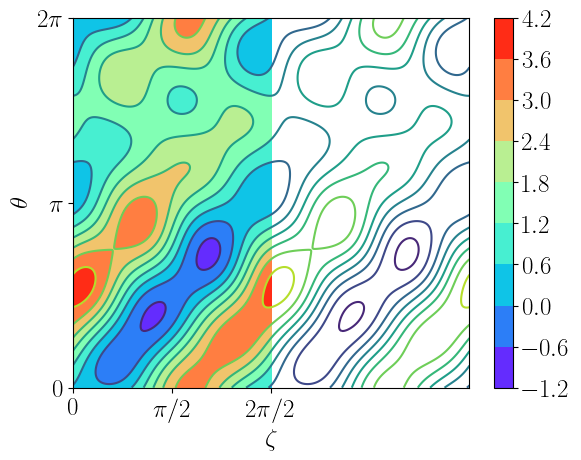

In [ ]:
fig, ax = plt.subplots()
ax.contour(
    gridBasisZeta, gridBasisTheta, funA(gridBasisTheta,gridBasisZeta)-funB(gridBasisTheta,gridBasisZeta)
)
fieldSubtract.plot_plt(ax=ax, fig=fig, onePeriod=True)

# 环形场$A(\theta,\zeta)$的导数

对于二维环形场$A(\theta,\varphi)$
$$
    A(\theta,\zeta) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$
其导数可以表示为
$$
    \frac{\partial A}{\partial\theta} = \sum_{m=-M}^{M}\sum_{n=-N}^{N}\mathrm{i}mA_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$
$$
    \frac{\partial A}{\partial\zeta} = \sum_{m=-M}^{M}\sum_{n=-N}^{N}-\mathrm{i}nN_{fp}A_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$

In [ ]:
dPolField = dcss.toroidalField.derivatePol(fieldAdd) 
dTorField = dcss.toroidalField.derivateTor(fieldAdd)

def getDerivate(field: dcss.toroidalField.ToroidalField, thetaArr: np.ndarray, varphiArr: np.ndarray) -> Tuple[np.ndarray]:
    deltaTheta, deltaPhi = 1e-10, 1e-10
    valueTheta = field.getValue(thetaArr+deltaTheta, varphiArr)
    value_Theta = field.getValue(thetaArr-deltaTheta, varphiArr)
    valuePhi = field.getValue(thetaArr, varphiArr+deltaPhi)
    value_Phi = field.getValue(thetaArr, varphiArr-deltaPhi)
    return (valueTheta-value_Theta)/deltaTheta/2, (valuePhi-value_Phi)/deltaPhi/2

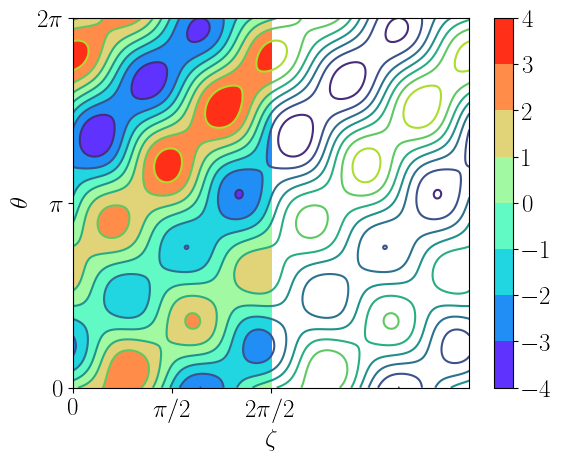

In [ ]:
fig, ax = plt.subplots()
ax.contour(
    gridBasisZeta, gridBasisTheta, getDerivate(fieldAdd, gridBasisTheta, gridBasisZeta)[0]
)
dPolField.plot_plt(ax=ax, fig=fig, onePeriod=True)

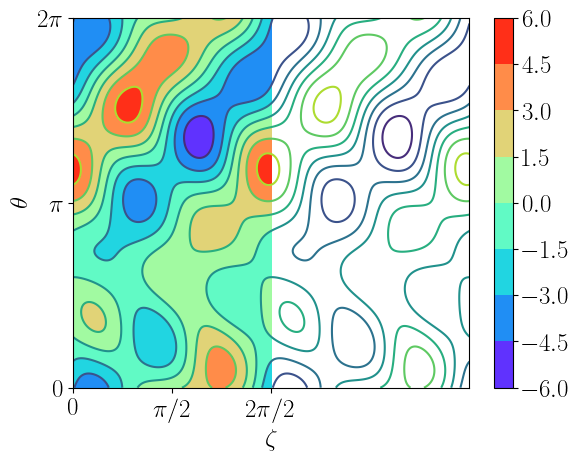

In [ ]:
fig, ax = plt.subplots()
ax.contour(
    gridBasisZeta, gridBasisTheta, getDerivate(fieldAdd, gridBasisTheta, gridBasisZeta)[1]
)
dTorField.plot_plt(ax=ax, fig=fig, onePeriod=True)

# 环形场$A(\theta,\zeta)$和$B(\theta,\zeta)$的积


$$
    A(\theta,\zeta)B(\theta,\zeta) = \sum_{m=-M}^{M}\sum_{n=-N}^{N}(AB)_{m,n}\exp(\mathrm{i}(m\theta-nN_{fp}\zeta))
$$
其中
$$
    (AB)_{m,n} = \sum_{m'=-M}^{M}\sum_{n'=-N}^{N} A_{m',n'}B_{m-m',n-n'}
$$

In [ ]:
fieldMulti = fieldA * fieldB

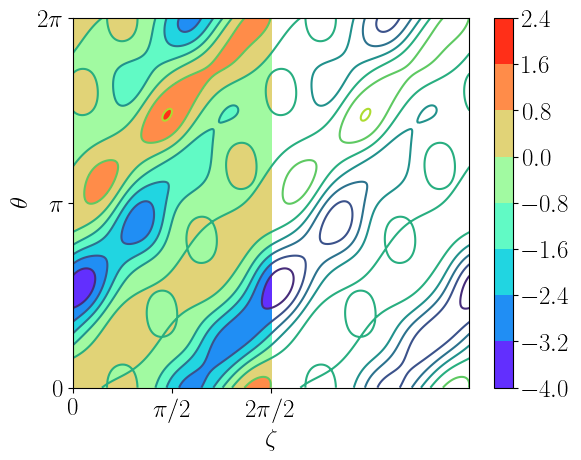

In [ ]:
fig, ax = plt.subplots()
ax.contour(
    gridBasisZeta, gridBasisTheta, funA(gridBasisTheta,gridBasisZeta)*funB(gridBasisTheta,gridBasisZeta)
)
fieldMulti.plot_plt(ax=ax, fig=fig, onePeriod=True)